In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_df = pd.read_csv('../datasets/train.csv')

In [7]:
#1 get a dictionary of mean
front = {}
for neigh in train_df['neighborhood'].unique():
    front[neigh] = train_df.loc[train_df['neighborhood'] == neigh]['lot_frontage'].mean()


In [8]:
front

{'sawyer': 72.77464788732394,
 'sawyerw': 70.49333333333334,
 'names': 75.19245283018869,
 'timber': 78.5945945945946,
 'edwards': 66.93023255813954,
 'oldtown': 62.802547770700635,
 'brdale': 21.31578947368421,
 'collgcr': 70.75324675324676,
 'somerst': 63.98290598290598,
 'mitchel': 75.47692307692307,
 'stonebr': 60.05882352941177,
 'nridght': 86.29411764705883,
 'gilbert': 72.02564102564102,
 'crawfor': 69.27272727272727,
 'idotrr': 61.890625,
 'nwames': 80.96551724137932,
 'veenker': 67.84615384615384,
 'meadowv': 26.80952380952381,
 'swisu': 58.38709677419355,
 'noridge': 88.30555555555556,
 'clearcr': 92.5,
 'blmngtn': 47.25,
 'brkside': 56.357142857142854,
 'npkvill': 27.625,
 'blueste': 27.666666666666668,
 'grnhill': nan,
 'greens': 40.0,
 'landmrk': nan}

In [9]:
for key, value in front.items():
    print(key, value)

sawyer 72.77464788732394
sawyerw 70.49333333333334
names 75.19245283018869
timber 78.5945945945946
edwards 66.93023255813954
oldtown 62.802547770700635
brdale 21.31578947368421
collgcr 70.75324675324676
somerst 63.98290598290598
mitchel 75.47692307692307
stonebr 60.05882352941177
nridght 86.29411764705883
gilbert 72.02564102564102
crawfor 69.27272727272727
idotrr 61.890625
nwames 80.96551724137932
veenker 67.84615384615384
meadowv 26.80952380952381
swisu 58.38709677419355
noridge 88.30555555555556
clearcr 92.5
blmngtn 47.25
brkside 56.357142857142854
npkvill 27.625
blueste 27.666666666666668
grnhill nan
greens 40.0
landmrk nan


In [43]:
train_df['lot_frontage'][train_df['lot_frontage'].isna()] = train_df['neighborhood'][train_df['lot_frontage'].isna()].map(front)

C:\Users\awong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
train_df.iloc[0]['neighborhood']

'sawyer'

In [46]:
train_df['lot_frontage']

0       72.774648
1       43.000000
2       68.000000
3       73.000000
4       82.000000
          ...    
2046    79.000000
2047    66.930233
2048    57.000000
2049    80.000000
2050    60.000000
Name: lot_frontage, Length: 2051, dtype: float64

In [38]:
class explore:
    def __init__(self, df, target):
        self.df = df
        self.target = target
        
        self.num_features = self.df.select_dtypes(include='number').columns
        
        self.nom_features = self.df.select_dtypes(exclude='number').columns
        
        corr = self.df[self.num_features].corr()[[self.target]] # make correlation table
        corr[self.target] = abs(corr[self.target])
        self.highcor = corr.sort_values(self.target, ascending=False).iloc[1:]
        
        print(f'File shape: {self.df.shape}, Null Values: {self.df.isna().sum().sum()}')
    
    def heatmap(self):
        corr = self.df[self.num_features].corr()[[self.target]]
        plt.figure(figsize=(16,9))
        return sns.heatmap(corr.sort_values(self.target), cmap='coolwarm', annot=True);
    
    def hc_hist(self, num_top_features=10):
        'high correlation of numberical features, default is top 10'
        return self.df[self.highcor.head(num_top_features).index].hist(figsize=(16,12));
    
    def scatter(self, start=0, end=-1):
        'scatter plot for all numerical features. Start and End to index the graphs, if there is too many for better viewing'
        features = self.num_features[start:end]
        fig, ax = plt.subplots(round(len(features) / 3), 3, figsize = (18,12))        
        
        for i, ax in enumerate(fig.axes):
            if i <= len(features) - 1:
                sns.regplot(x=features[i], y=self.df[self.target], data=self.df[features], ax=ax)
        plt.tight_layout();
        
        print(f'graph displayed: {len(features)} out of {len(self.num_features)}')
    
    def countplot(self, start=0, end=-1):
        features = self.nom_features[start:end]
        fig, ax = plt.subplots(round(len(features) / 3), 3, figsize = (18,12))   
        features_used = []
        
        for i, ax in enumerate(fig.axes):
            if i <= len(features) - 1:
                ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
                ax.set_xlabel(ax.get_xlabel(), fontsize=16)
                sns.countplot(x=features[i], data=self.df[features], ax=ax)
                features_used.append(features[i])

        plt.tight_layout()
        
        print(f'graph displayed: {len(features)} out of {len(self.nom_features)}. Features used: {features_used}')

In [39]:
df_exp = explore(train_df, 'saleprice')

File shape: (2051, 74), Null Values: 0


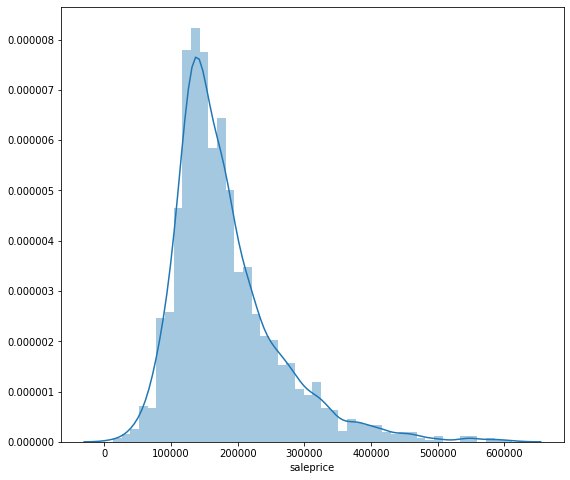

In [21]:
# target distribution

plt.figure(figsize=(9, 8))
sns.distplot(df_exp.df[df_exp.target]);

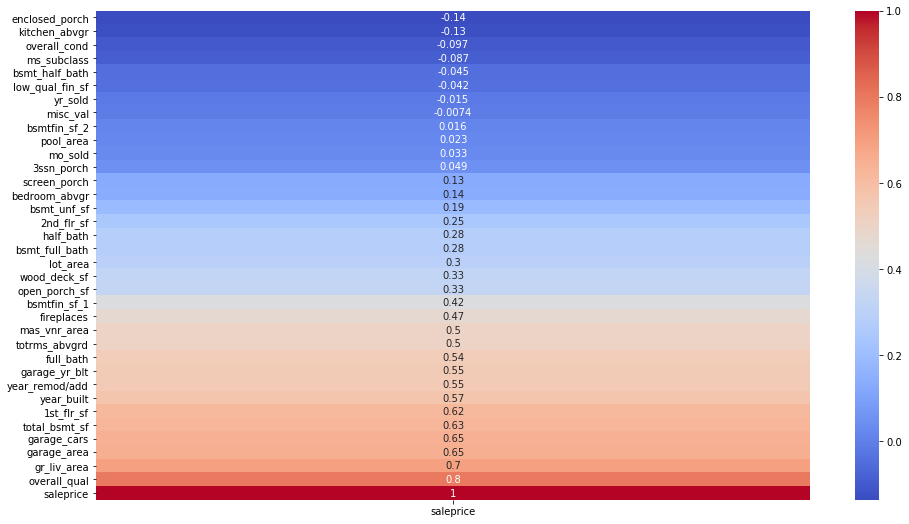

In [22]:
df_exp.heatmap();

In [43]:
df_exp.highcor.head(10).index.tolist() # using top 20 features 

['overall_qual',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 '1st_flr_sf',
 'year_built',
 'year_remod/add',
 'garage_yr_blt',
 'full_bath']

### Nominal Featrures charts

graph displayed: 15 out of 38. Features used: ['ms_zoning', 'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st']


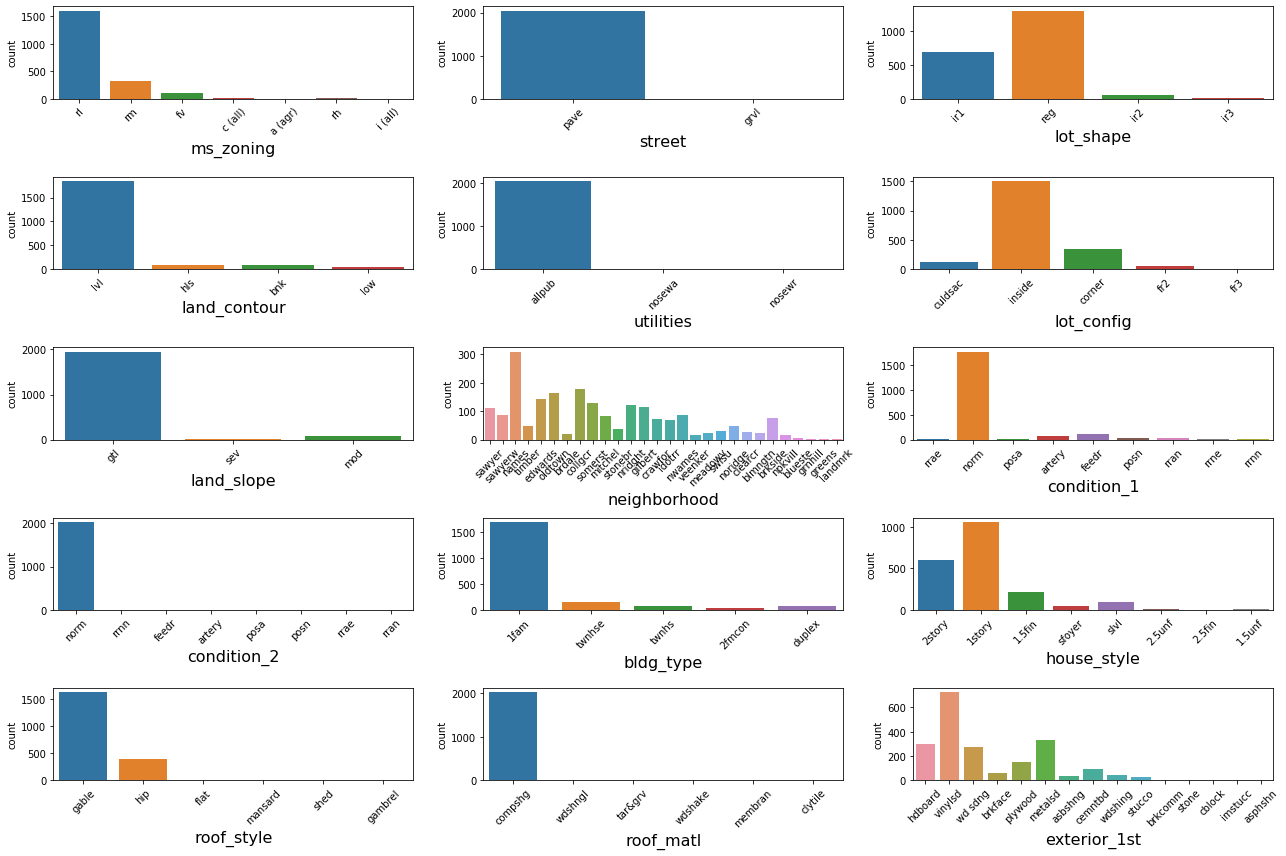

In [40]:
df_exp.countplot(0,15)

graph displayed: 15 out of 38. Features used: ['exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual']


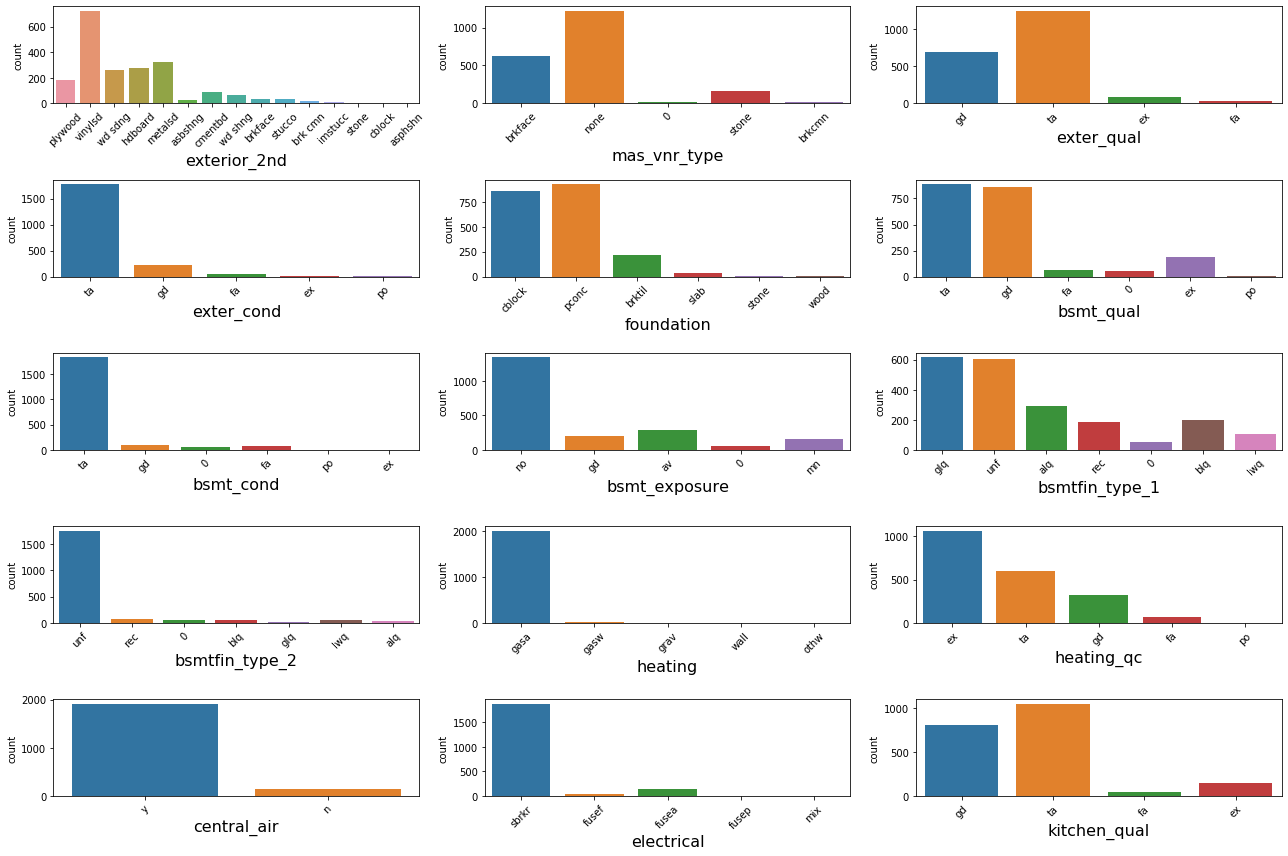

In [41]:
df_exp.countplot(15,30)

graph displayed: 7 out of 38. Features used: ['functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond']


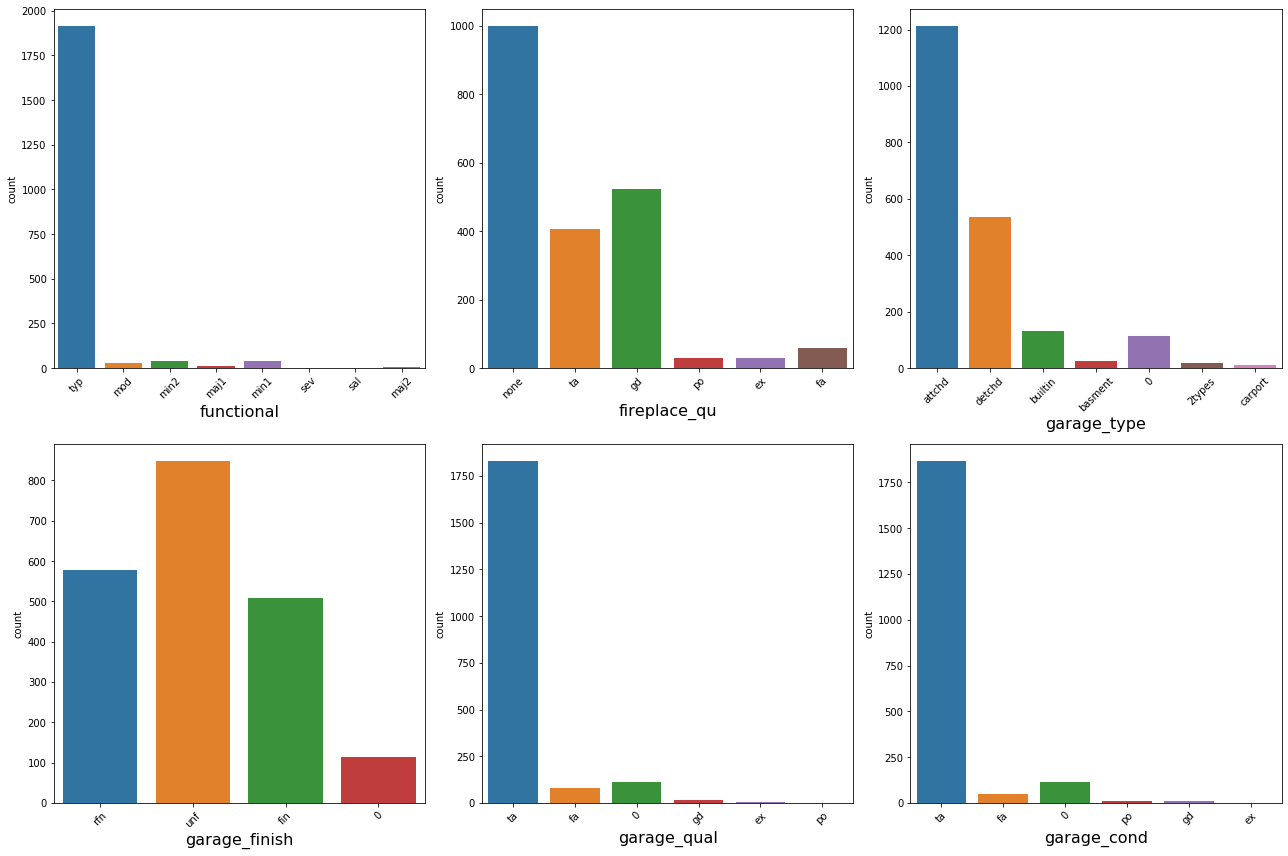

In [42]:
df_exp.countplot(30,)

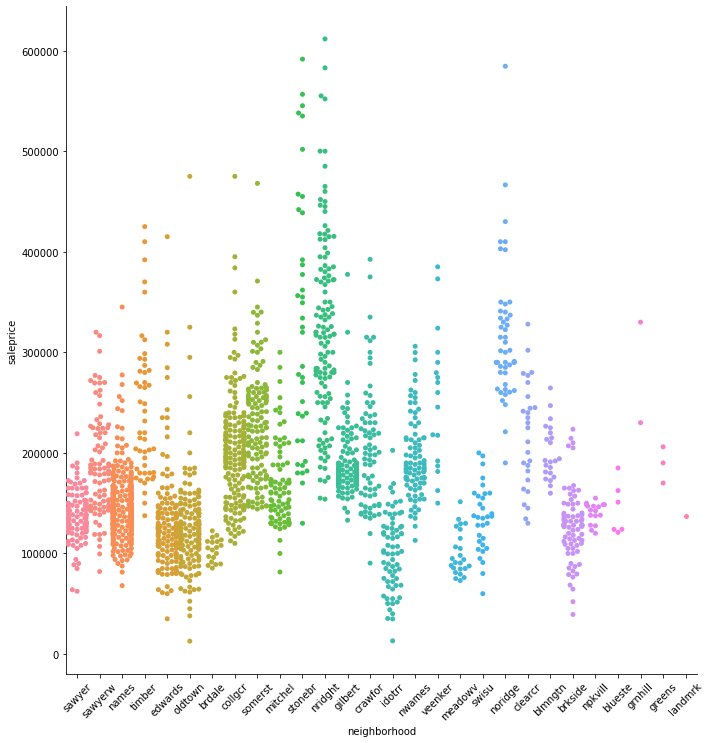

In [453]:
# take a closer look a neighborhood

nb = sns.catplot('neighborhood', df_exp.target, data=df_exp.df, kind='swarm', size=10)
nb.set_xticklabels(rotation=45);

### Numerial Features Charts

graph displayed: 12 out of 36


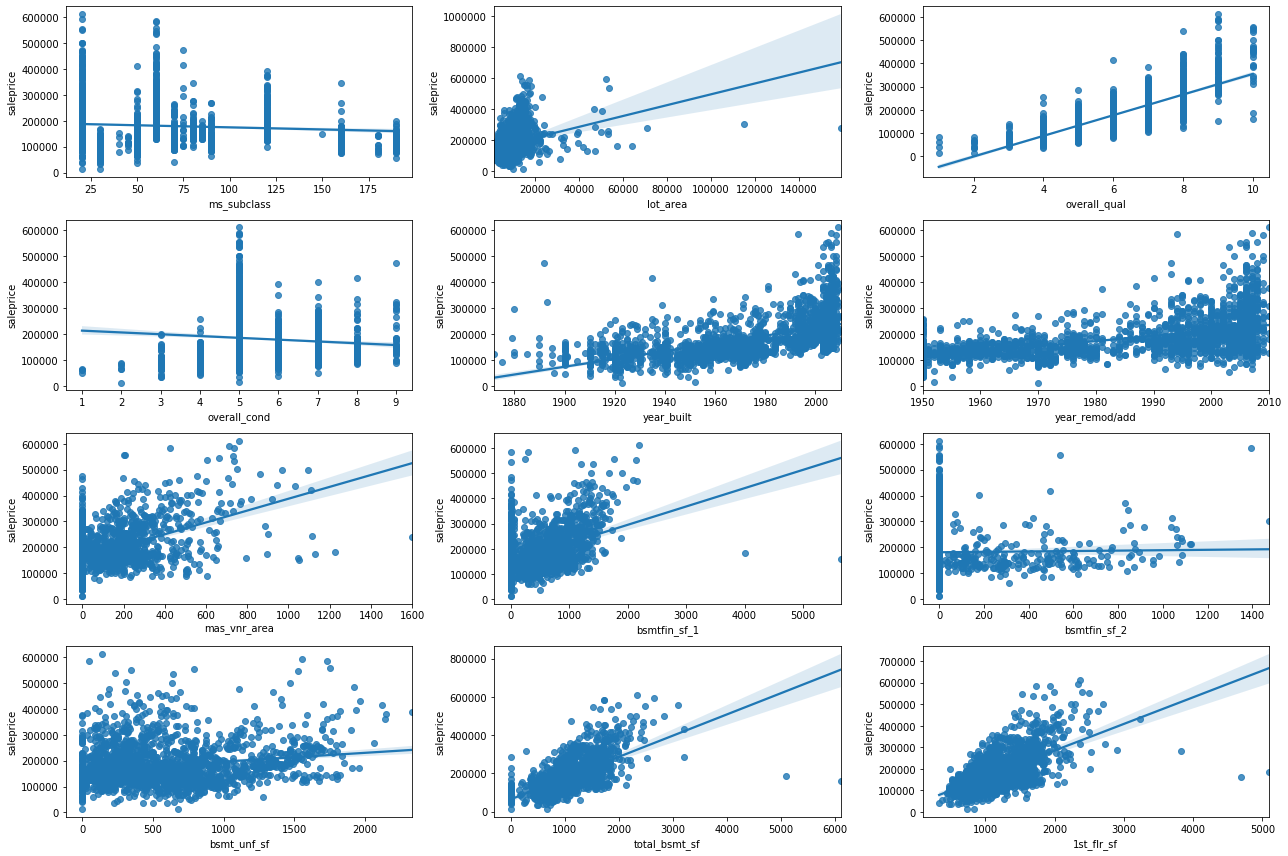

In [449]:
df_exp.scatter(0,12)

graph displayed: 9 out of 36


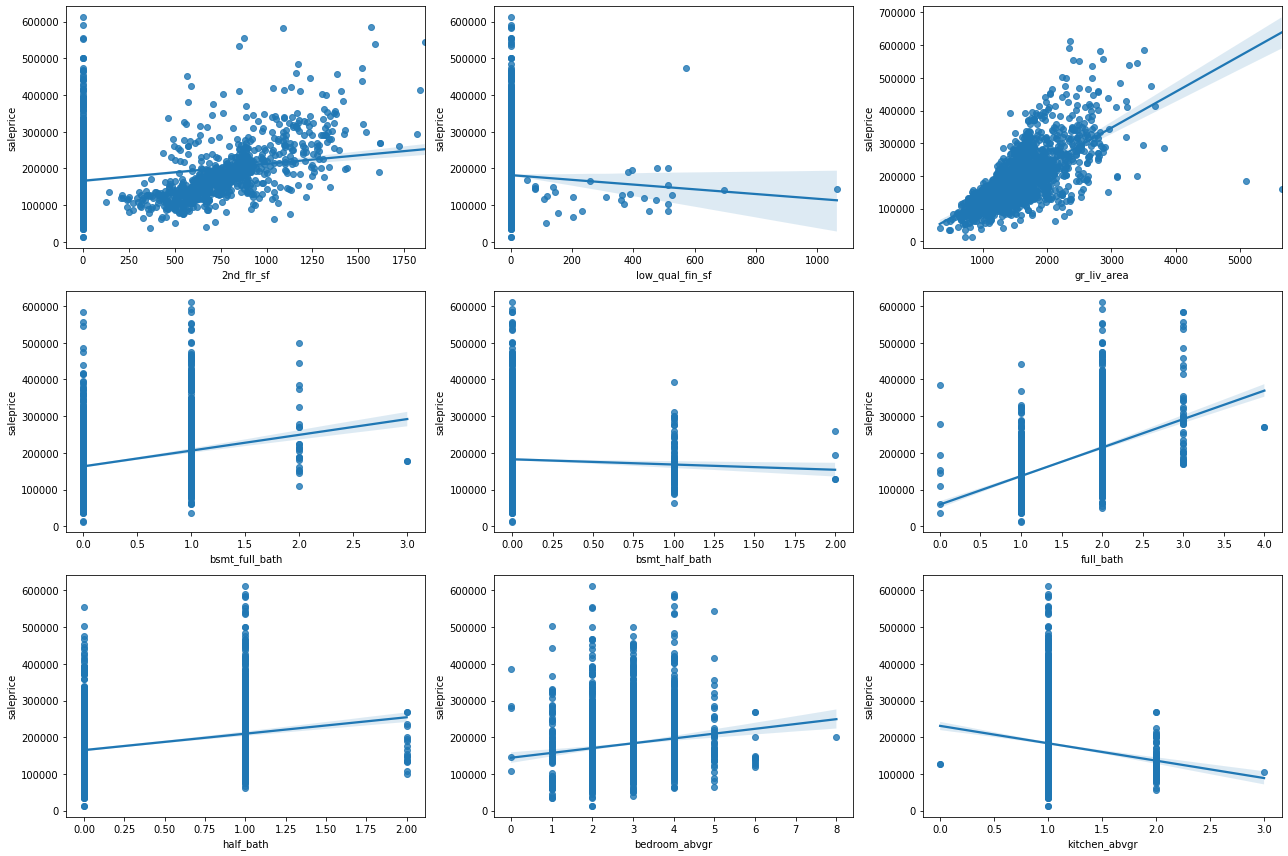

In [448]:
df_exp.scatter(12,21)

graph displayed: 14 out of 36


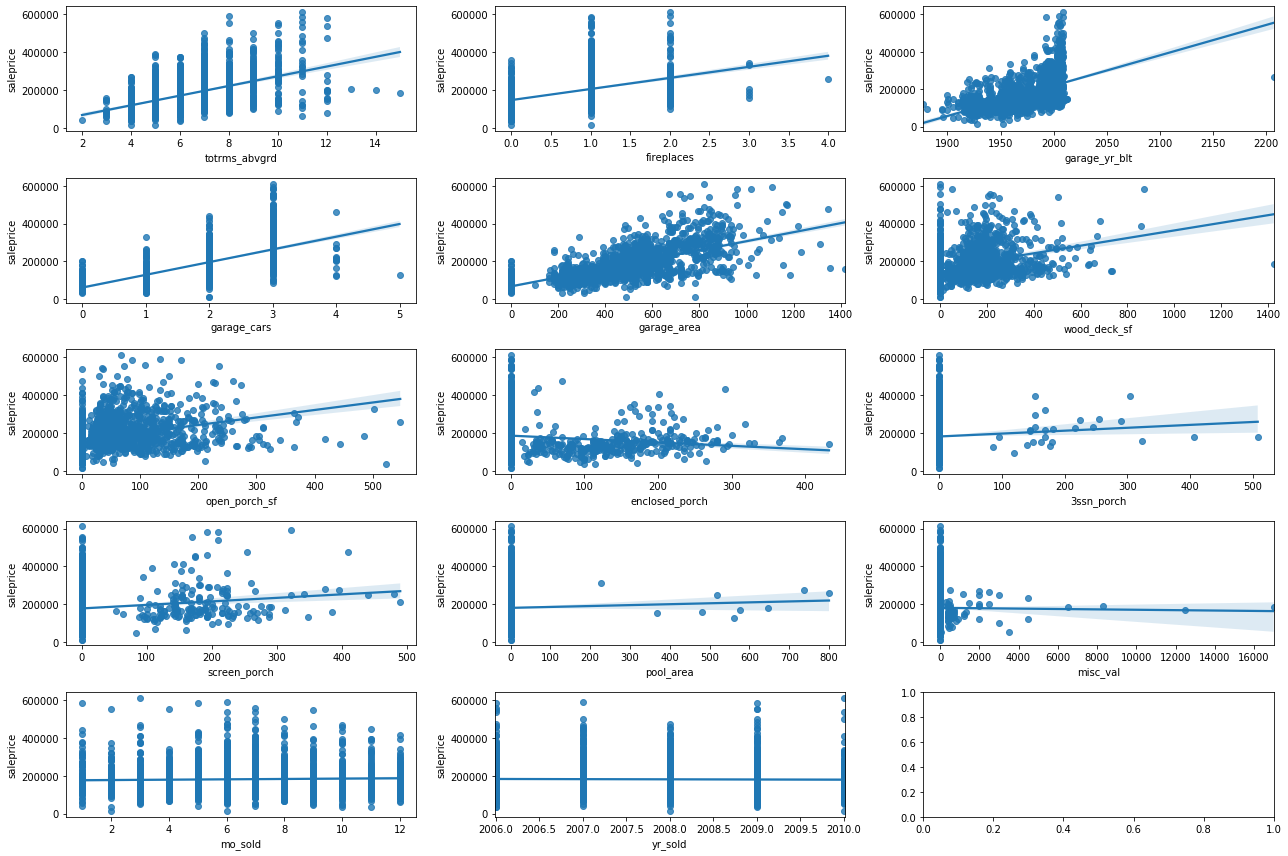

In [450]:
df_exp.scatter(21,)

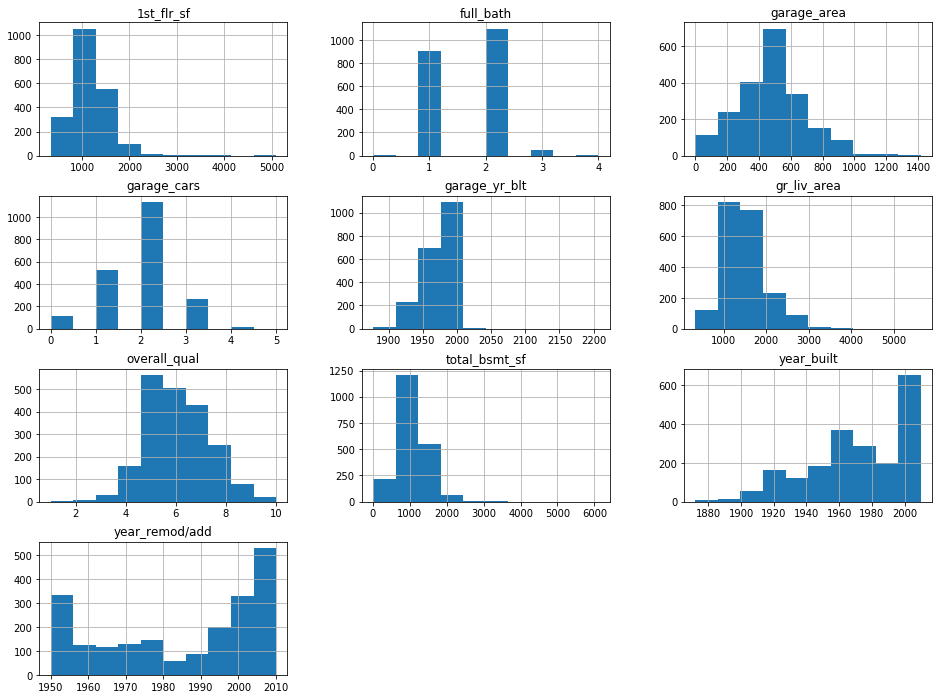

In [12]:
# Distrubution of our top 15 features base on correlation

df_exp.hc_hist();